20BRS1075 Aman Gupta


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

In [2]:
data=pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=data.iloc[:,0:4]
y=data.iloc[:,4]


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
xtrain

In [ ]:
pca = PCA(n_components = 2)
  
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
  
explained_variance = pca.explained_variance_ratio_

xtrain

In [ ]:
classifier = LogisticRegression(random_state = 0)
le = preprocessing.LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)

classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [ ]:
ypred = classifier.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]


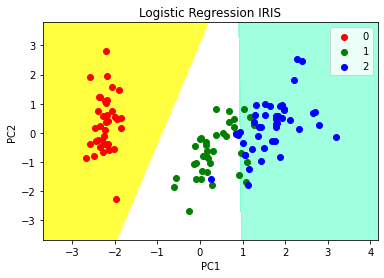

In [ ]:
X_set, y_set = xtrain, ytrain
X1,X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression IRIS')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend()
plt.show()